In [276]:
import pandas as pd
import quandl , math, datetime
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib
style.use('ggplot')
import pickle
from statistics import mean
import random
%matplotlib notebook

In [277]:
df = quandl.get('WIKI/AAPL')

In [278]:
df = df.iloc[:,-5:]

In [279]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
1980-12-12,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,0.391536,0.393300,0.391536,0.391536,18362400.0


In [280]:
df['vol'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.
df['PRC_chang'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.

In [281]:
df = df[['Adj. Close','vol','PRC_chang','Adj. Volume']]

In [282]:
forcast_col = 'Adj. Close'

In [283]:
df.fillna(-9999,inplace=True)

In [284]:
forcast_out = int(math.ceil(0.005*df.shape[0])) ; forcast_out

47

In [285]:
df['label'] = df[forcast_col].shift(-forcast_out)

In [287]:
X = np.array(df.drop('label',1))
X = preprocessing.scale(X)
X_lately = X[-forcast_out:]
X = X[:-forcast_out]

In [288]:
df.dropna(inplace = True)

In [289]:
Y = np.array(df['label'])

In [290]:
print(len(X),len(Y))

9322 9322


In [291]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y,test_size=0.3)

In [292]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,Y_train)
with open('linear_regr.pickle','wb') as f:
    pickle.dump(clf,f)

In [293]:
mypickle = open('linear_regr.pickle','rb')
new_clf = pickle.load(mypickle)

In [294]:
new_clf.score(X_test,Y_test)

0.9886200772980649

In [295]:
forcast_set = clf.predict(X_lately) ; forcast_set

array([175.88344152, 175.72715977, 175.04821543, 175.60572806,
       175.48807123, 178.8203173 , 177.95917064, 178.51864002,
       178.47238199, 180.15378323, 182.77594614, 180.8718002 ,
       180.64121285, 181.34175896, 181.38715369, 176.73991838,
       176.81603744, 177.30319733, 175.37649154, 178.44686481,
       178.42583601, 179.31416712, 181.31347692, 180.6671672 ,
       180.64576872, 180.62174531, 181.66285759, 183.49740081,
       182.48913598, 185.46854177, 185.72750808, 184.88591561,
       183.42242114, 183.39740281, 180.3888154 , 177.16598777,
       177.7004251 , 173.96085413, 172.9703033 , 173.49027416,
       173.84932818, 165.89218162, 162.8821955 , 168.55073759,
       165.18376935, 160.73255535, 161.30906938])

In [296]:
df['Forcast'] = np.nan
last_day = df.iloc[-1].name
last_unix = last_day.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [297]:
for i in forcast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]


<IPython.core.display.Javascript object>


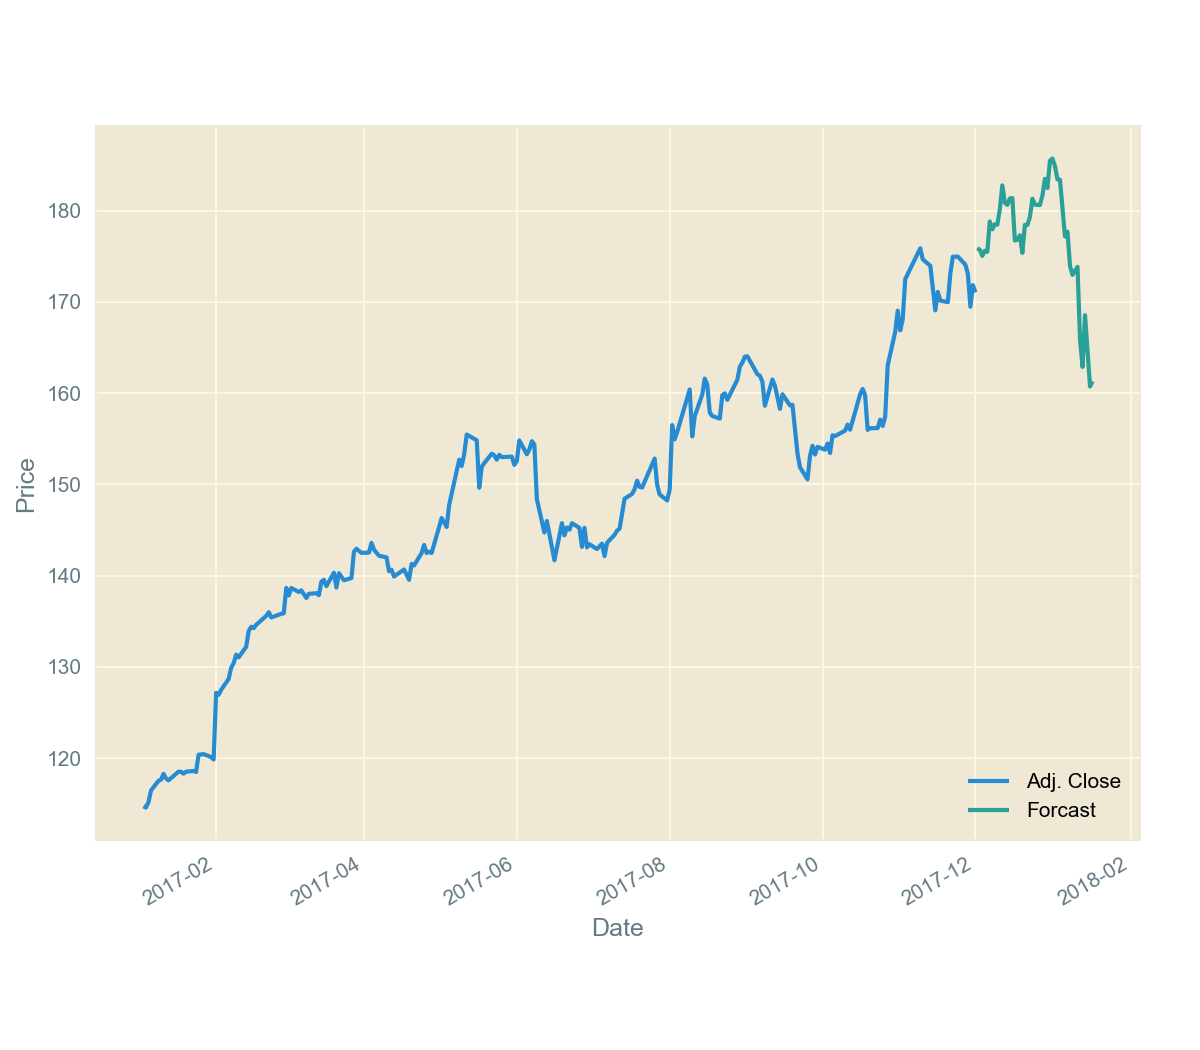

In [299]:
style.use('Solarize_Light2')
plt.figure(figsize=(8,7))
df.loc['2017-01-01':,'Adj. Close'].plot()
df['Forcast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [83]:
#--------------------------

In [302]:
def create_dataset(val,variece, step=2,correlation= False):
    seed = 1
    ys= []
    for i in range(val):
        y = seed + random.randrange(-variece,variece)
        if correlation and correlation =="positive":
            seed+=step
        elif correlation and correlation =="negative":
            seed-=step
        ys.append(y)
    xs = [i for i in range(val)]
    return np.array(xs,dtype="float64"), np.array(ys,dtype="float64")

#xs = np.array([1,2,3,4,5,6],dtype='float64')
#ys = np.array([-1,-2,-2,-2,-3,-4],dtype='float64')
xs, ys = create_dataset(50,25, step=2,correlation= 'negative')



def get_slope(xs,ys):
    mean_x = mean(xs)
    mean_y = mean(ys)
    mean_xy = mean(xs*ys)
    mean_xs_sq = mean(xs**2)
    
    m = ( (mean_x*mean_y - mean_xy) / 
         ( (mean_x**2) - mean_xs_sq))
    return m

m = get_slope(xs,ys) ; m

def get_b(xs,ys,m):
    b = mean(ys) - mean(xs)*m
    return b

b = get_b(xs,ys,m) ; b

def sqr_error(y_or,y_line):
    return sum( (y_line - y_or)**2)

def coefficient_of_determination(y_or,y_line):
    y_mean_line = [mean(y_or) for _ in y_or]
    sqr_err_mean = sqr_error(y_or,y_mean_line)
    sqr_err_regr = sqr_error(y_or,y_line)
    return 1 - (sqr_err_regr / sqr_err_mean)
    

regresion_line = (xs * m) +b ;regresion_line

print("<Y>="+"X*"+str(round(m,2))+"+"+str(round(b,2))+"\nR^2= "+str(round(coefficient_of_determination(ys,regresion_line),2)))

rl = [x*m+b for x in xs]

predict_series = [float(i) for i in range(0,60,5)] ; predict_series

predictor_ = [m*i+b for i in predict_series] ; predictor_

<Y>=X*-2.22+5.24
R^2= 0.83


[5.242352941176492,
 -5.88057623049218,
 -17.00350540216085,
 -28.12643457382952,
 -39.249363745498194,
 -50.37229291716687,
 -61.49522208883553,
 -72.6181512605042,
 -83.74108043217288,
 -94.86400960384155,
 -105.98693877551023,
 -117.1098679471789]

<IPython.core.display.Javascript object>


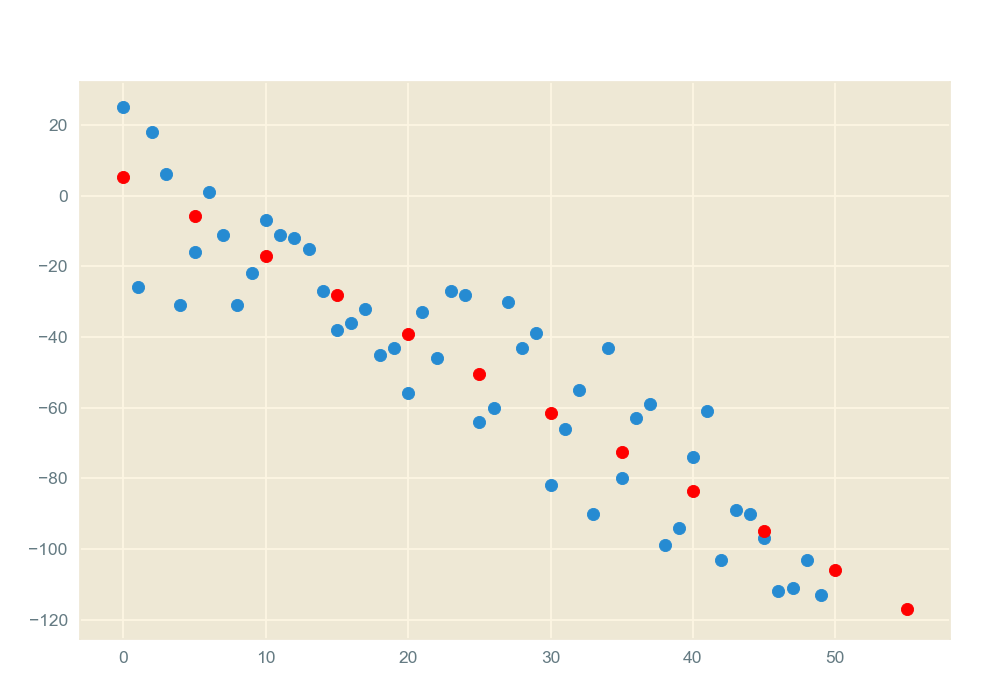

In [303]:
style.use('Solarize_Light2')
plt.figure()
plt.scatter(xs,ys)
#plt.plot(rl,c='k')
plt.scatter(predict_series,predictor_, c='r')